## Tomato Disease Analysis & Prediction

you will need to download the dataset first before to start running the Notebook.

you can download the dataset from `kaggle.com` [Here](https://www.kaggle.com/noulam/tomato)

## Import Package and initiate constants.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_dir = './New Plant Diseases Dataset(Augmented)/train'
submission_dir = './New Plant Diseases Dataset(Augmented)/valid'
IMAGESIZE = 64
BATCHSESIZE = 32
CHANNELS = 3
EPOCHS=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    shuffle=True,
    image_size=(IMAGESIZE, IMAGESIZE),
    batch_size=BATCHSESIZE
    )

class_names = dataset.class_names
n_classes = len(class_names)

Found 18345 files belonging to 10 classes.


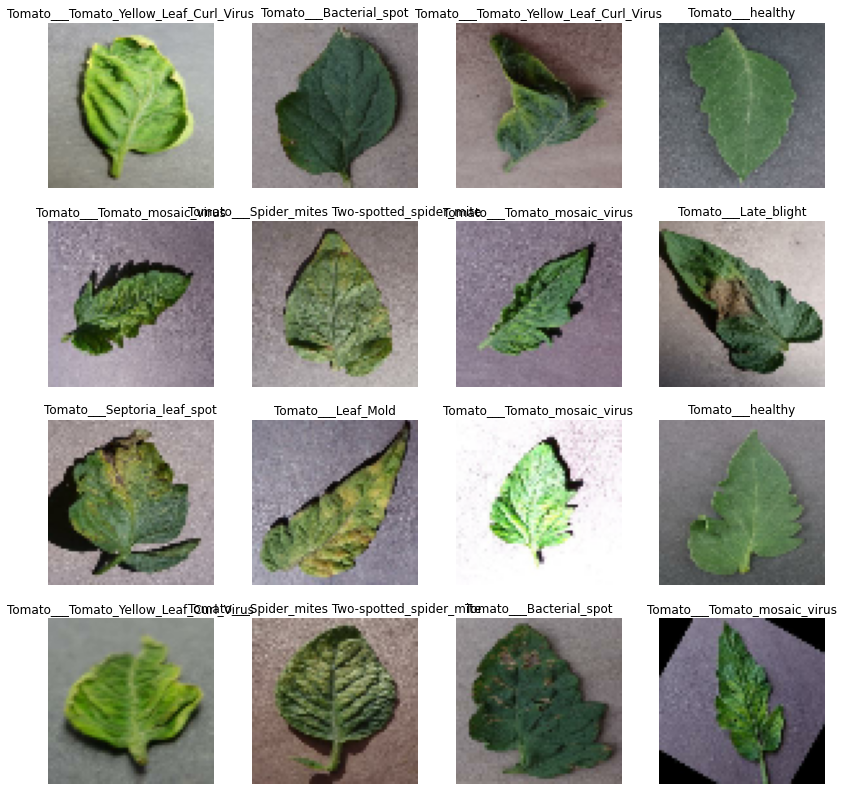

In [4]:
plt.figure(figsize=(14 , 14))
for image, label in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [5]:
len(dataset)

574

## Split Dataset

we will split the data set by 80% for the traing data and 20% for validation and testing 10% foreach

In [6]:
train_pct = .8
valid_test_pct = .2
test_pct = .1
valid_pct = .1

train_count = int(len(dataset)*train_pct)
valid_text_count = int(len(dataset)*valid_test_pct)
test_count = int(len(dataset)*test_pct)
valid_count = int(len(dataset)*valid_pct)

In [7]:
train_ds = dataset.take(train_count)
test_ds = dataset.skip(train_count)
valid_ds = dataset.take(valid_count)
test_ds = test_ds.skip(valid_count)

print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))

459
58
57


## Build the models

 - resize and rescaling model
 - contrast and fliping model
 - main model

In [8]:
# resizeing and rescaling
resize_and_rescale = models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGESIZE, IMAGESIZE),
    layers.experimental.preprocessing.Rescaling(1./255.),
])

# contrast and fliping
contrast_and_fliping = models.Sequential([
    layers.experimental.preprocessing.RandomContrast(.2),
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(.2),
])


In [9]:
INPUT_SHAPE = (BATCHSESIZE, IMAGESIZE, IMAGESIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    contrast_and_fliping,
    layers.Conv2D(32, (3, 3), padding='SAME', activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((3, 3)),

    layers.Conv2D(64, (3, 3), padding='SAME', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='SAME', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='SAME', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(INPUT_SHAPE)

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 64, 64, 3)           0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 64, 64, 3)           0         
_________________________________________________________________
conv2d (Conv2D)              (32, 64, 64, 32)          896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 21, 21, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 21, 21, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 10, 10, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 10, 10, 64)         

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    shuffle=True,
    epochs=EPOCHS,
    verbose=1,
)

Epoch 1/10
459/459 [==============================] - 316s 687ms/step - loss: 1.7312 - accuracy: 0.3636 - val_loss: 1.5086 - val_accuracy: 0.5104
Epoch 2/10
459/459 [==============================] - 74s 160ms/step - loss: 0.9468 - accuracy: 0.6591 - val_loss: 0.8042 - val_accuracy: 0.7171
Epoch 3/10
459/459 [==============================] - 76s 166ms/step - loss: 0.7165 - accuracy: 0.7451 - val_loss: 0.6368 - val_accuracy: 0.7752
Epoch 4/10
459/459 [==============================] - 89s 194ms/step - loss: 0.6057 - accuracy: 0.7841 - val_loss: 0.6751 - val_accuracy: 0.7675
Epoch 5/10
459/459 [==============================] - 89s 193ms/step - loss: 0.5328 - accuracy: 0.8098 - val_loss: 0.5452 - val_accuracy: 0.8010
Epoch 6/10
459/459 [==============================] - 76s 166ms/step - loss: 0.4893 - accuracy: 0.8288 - val_loss: 0.5181 - val_accuracy: 0.8240
Epoch 7/10
459/459 [==============================] - 84s 183ms/step - loss: 0.4562 - accuracy: 0.8393 - val_loss: 0.8100 - val_a

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Checking the training & test performance

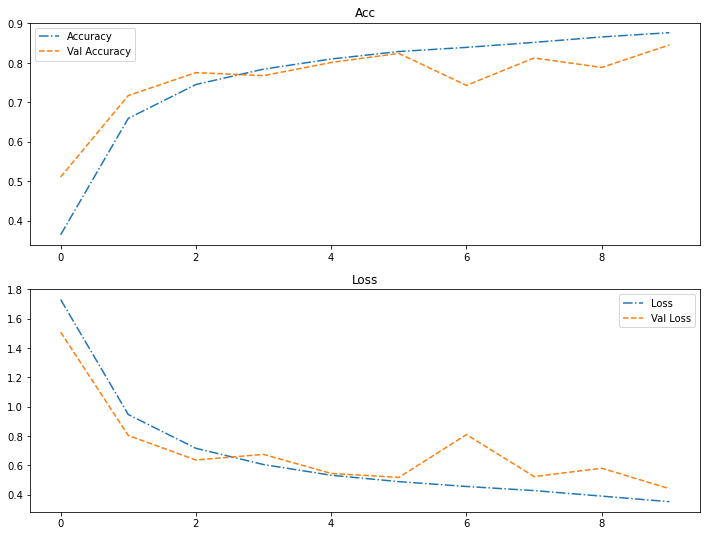

In [14]:
epochs_range = range(EPOCHS)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

ax1.plot(epochs_range, acc, label='Accuracy', linestyle='-.')
ax1.plot(epochs_range, val_acc, label='Val Accuracy', linestyle='--')

ax2.plot(epochs_range, loss, label='Loss', linestyle='-.')
ax2.plot(epochs_range, val_loss, label='Val Loss', linestyle='--')

ax1.set_title('Acc')
ax2.set_title('Loss')

ax1.legend()
ax2.legend()

In [15]:
score = model.evaluate(test_ds)
score

58/58 [==============================] - 60s 444ms/step - loss: 0.4269 - accuracy: 0.8494


[0.4269354045391083, 0.8494271636009216]

In [16]:
predictions = model.predict(test_ds)

In [17]:
predictions.shape

(1833, 10)

In [18]:
predictions_classes = np.argmax(predictions, axis=1)

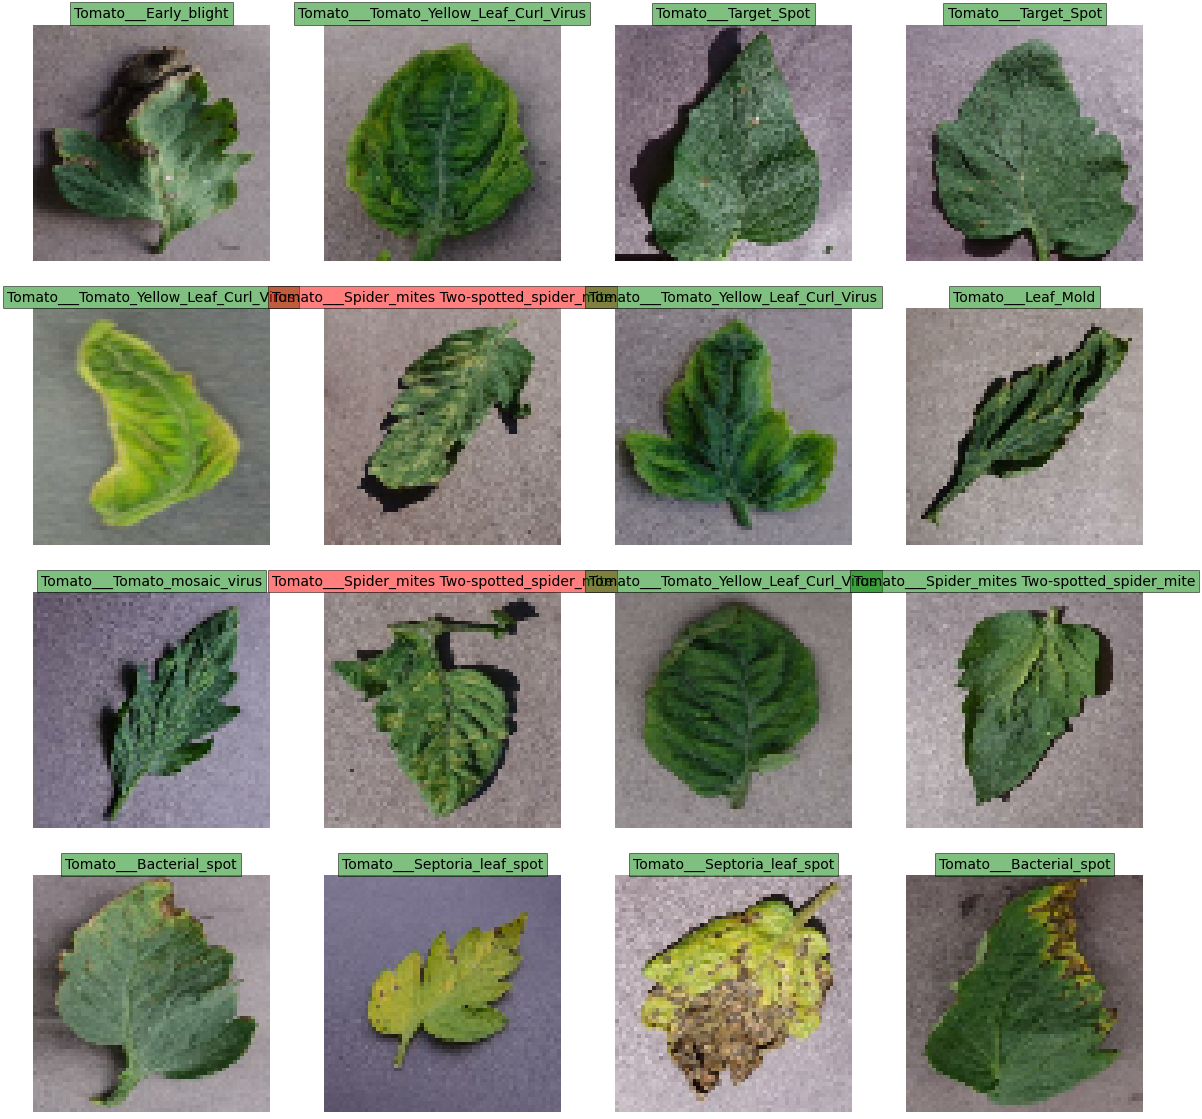

In [19]:
plt.figure(figsize=(20, 20))

test_sample = test_ds.take(1)

# predictions = model.predict(test_sample)
# predictions_classes = np.argmax(predictions, axis=1)

for images, label in test_sample:
    predicted = np.argmax(model.predict(images), axis=1)

    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        if class_names[label[i]] == class_names[predicted[i]]:
            plt.text(.5, 1.03, class_names[predicted[i]], ha='center', 
                     transform=ax.transAxes, fontdict=dict(size=14),
                     bbox={'facecolor': 'green', 'alpha': 0.5})
        else:
            plt.text(.5, 1.03, class_names[predicted[i]], ha='center', 
                     transform=ax.transAxes, fontdict=dict(size=14),
                     bbox={'facecolor': 'red', 'alpha': 0.5})
        plt.axis('off')

In [20]:
import os

models_dir = './saved_models'

def save_model(model):
    latest_version = len(os.listdir(models_dir))+1
    
    model.save(f'{models_dir}/{latest_version}')

if not os.path.isdir(models_dir):
    os.mkdir(models_dir)
    save_model(model)
else:
    save_model(model)


INFO:tensorflow:Assets written to: ./models/1/assets


In [29]:
submission_ds = tf.keras.preprocessing.image_dataset_from_directory(
    submission_dir,
    shuffle=True,
    image_size=(IMAGESIZE, IMAGESIZE),
    batch_size=BATCHSESIZE
    )

class_names = dataset.class_names
n_classes = len(class_names)

Found 4585 files belonging to 10 classes.


In [49]:
submission_predictions = model.predict(submission_ds)
submission_predictions_classes = np.argmax(submission_predictions, axis=1)

submission_predictions_classes

array([3, 3, 3, ..., 3, 3, 3])